<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/EBCM_no_markoviano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EBCM no-markoviano

Suponemos dados:


1.   $I(0)>0$, $S(0)=1-I(0)$, $R(0)=0$.
2.   $\psi$ la función generadora de probabilidad de la distribución de grados.
3.   $\theta(0)=\psi^{-1}(1-I(0))$
4.   $z(a)$, $\rho(a)$ funciones de riesgo de las distribuciones de transmisión y recuperación, independientes.

Para resolver el sistema de ecuaciones:
\begin{align}
\dot{\theta}(t)&=-\int_0^t z(a)\phi_I(t,a)da\\
\left(\frac{\partial }{\partial t}+\frac{\partial}{\partial a}\right)\phi_I(t,a)&=-\left(z(a)+\rho(a)\right)\phi_I(t,a)\\
\phi(t,0)&=\frac{\psi''(\theta(t))}{\psi'(1)}\int_0^t z(a)\phi_I(t,a)da\\
\left(\frac{\partial }{\partial t}+\frac{\partial}{\partial a}\right)i(t,a)&=-\rho(a)i(t,a)\\
i(t,0)&=\psi'(\theta(t))\int_0^t z(a)\phi_I(t,a)da\\
S(t)=\psi(\theta(t)), \quad &I(t)=\int_0^t i(t,a)da, \quad R(t)=1-S(t)-I(t)
\end{align}






In [1]:
import numpy as np
def EBCM_non_markovian(iniciales,riesgo_inf,riesgo_rec,fgp,fgp_prime_1,fgp_prime_2,step_len,fin):
  S_0,I_0,R_0,theta_0=iniciales
  z=riesgo_inf
  rho=riesgo_rec
  beta=riesgo_inf(0)
  t,a,k=0,0,0
  T=[0]
  theta=[theta_0]
  phi_t_a=[theta_0-(fgp_prime_1(theta_0))/(fgp_prime_1(1))]
  i_t_a=[I_0]
  I=[I_0]
  h=step_len
  while(t<fin):
    k+=1
    phi_t_a_new=[]
    i_t_a_new=[]
    int_z_phi=np.sum([z(a+i*h)*phi_t_a[i] for i in range(len(phi_t_a))])*h
    theta.append(theta[-1]-int_z_phi)
    phi_t_a_new.append(int_z_phi*fgp_prime_2(theta_0)/fgp_prime_1(1))
    i_t_a_new.append(fgp_prime_1(theta_0)*int_z_phi)
    theta_0=theta[-1]
    for j in range(k):
      phi_t_a_new.append(phi_t_a[j]-(rho(a+h*j)+z(a+h*j))*phi_t_a[j]*h)
      i_t_a_new.append(i_t_a[j]-(rho(a+h*j))*i_t_a[j]*h)
    I.append(np.sum(i_t_a_new))
    phi_t_a=phi_t_a_new
    i_t_a=i_t_a_new
    t+=h
    T.append(t)
    #print("I(t):",I[-1])
  return T,I

## Ejemplo

Función generadora de probabilidad:
$$\psi(x)=\frac{1}{31}\left(25x+5x^5+x^{25}\right)$$

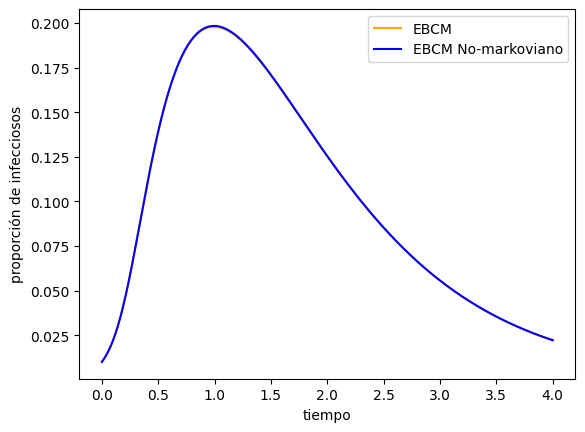

14.767296314239502 segundos para generarla


In [ ]:
import time
start_t=time.time()
import matplotlib.pyplot as plt
def psi(x):
    return ((1/31)*(25*x+5*x**5+x**25))
def psi_prime_1(x):
    return (1/31)*(25+25*x**4+25*x**24)
def psi_prime_2(x):
    return (1/31)*(100*x**3+(25*24)*x**23)
from scipy.optimize import fsolve
I_0=0.01
def psi_CI(x):
  return psi(x)+I_0-1
theta_0=fsolve(psi_CI,1,)[0]
iniciales=[1-I_0,I_0,0,theta_0]
beta=1.2
gamma=1.0
fin_T=4
def beta_cte(a):
    return beta
def gamma_cte(a):
    return gamma
T,I=EBCM_non_markovian(iniciales=iniciales,riesgo_inf=beta_cte,riesgo_rec=gamma_cte,fgp=psi,fgp_prime_1=psi_prime_1,fgp_prime_2=psi_prime_2,step_len=0.001,fin=fin_T)
####
def EBCM_2(y, t, beta, gamma,psi,psi_prime):
    theta, R = y
    dydt = [-beta*theta+beta*(psi_prime(theta)/psi_prime(1))+gamma*(-theta+theta_0), gamma*(1-psi(theta)-R)]
    return dydt
from scipy.integrate import odeint
y0 = [theta_0, 0.0]
t = np.linspace(0, fin_T, 1001)
sol_2 = odeint(EBCM_2, y0, t, args=(beta, gamma,psi,psi_prime_1))
plt.ylabel('proporción de infecciosos')
plt.xlabel('tiempo')
plt.plot(t,1-psi(sol_2[:,0])-sol_2[:,1],'orange',label='EBCM')
plt.plot(T,I,'blue',label='EBCM No-markoviano')
plt.legend()
plt.show()
print(time.time()-start_t, 'segundos para generarla')

## Ejemplo
Función generadora de probabilidad:
$$\psi(x)=e^{-\lambda (1-x)}$$

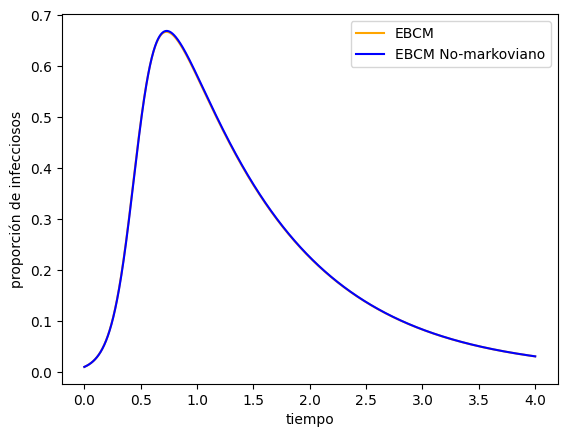

17.61353087425232 segundos para generarla


In [ ]:
start_t=time.time()
lam=10
def psi_poisson(x):
  return np.exp(-lam*(1-x))
def psi_poisson_prime(x):
  return lam*np.exp(-lam*(1-x))
def psi_poisson_prime_2(x):
  return (lam**2)*np.exp(-lam*(1-x))
from scipy.optimize import fsolve
def psi_CI(x):
  return psi_poisson(x)+I_0-1
theta_0=fsolve(psi_CI,1,)[0]
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
I_0=0.01
def psi_CI_poisson(x):
  return psi_poisson(x)+I_0-1
theta_0=fsolve(psi_CI,1,)[0]
iniciales=[1-I_0,I_0,0,theta_0]
beta=1.2
gamma=1.0
fin_T=4
def beta_cte(a):
    return beta
def gamma_cte(a):
    return gamma
T,I=EBCM_non_markovian(iniciales=iniciales,riesgo_inf=beta_cte,riesgo_rec=gamma_cte,fgp=psi_poisson,fgp_prime_1=psi_poisson_prime,fgp_prime_2=psi_poisson_prime_2,step_len=0.001,fin=fin_T)
####
def EBCM_2(y, t, beta, gamma,psi,psi_prime):
    theta, R = y
    dydt = [-beta*theta+beta*(psi_prime(theta)/psi_prime(1))+gamma*(-theta+theta_0), gamma*(1-psi(theta)-R)]
    return dydt
from scipy.integrate import odeint
y0 = [theta_0, 0.0]
t = np.linspace(0, fin_T, 1001)
sol_2 = odeint(EBCM_2, y0, t, args=(beta, gamma,psi_poisson,psi_poisson_prime))
plt.ylabel('proporción de infecciosos')
plt.xlabel('tiempo')
plt.plot(t,1-psi_poisson(sol_2[:,0])-sol_2[:,1],'orange',label='EBCM')
plt.plot(T,I,'blue',label='EBCM No-markoviano')
plt.legend()
plt.show()
print(time.time()-start_t, 'segundos para generarla')


## Ejemplo
Función generadora de probabilidad:
$$\psi(x)=\sum\limits_{k=0}^{10^3}k^{-1.418}e^{-k/40}x^k$$

In [3]:
import time
start_t=time.time()
s=0
N=10**3
for k in range(1,N):
    s+=k**(-1.418)*np.exp(-k/40)
s=s**(-1)
def approx_psi_powerlaw(x):
    u=0
    for k in range(1,3000):
        u+=k**(-1.418)*np.exp(-k/40)*x**k
    return s*u
def approx_prime_psi_powerlaw(x):
    u=0
    for k in range(1,3000):
        u+=k**(-0.418)*np.exp(-k/40)*x**(k-1)
    return s*u
def approx_prime_2_psi_powerlaw(x):
    u=0
    for k in range(1,3000):
        u+=(k-1)*k**(-0.418)*np.exp(-k/40)*x**(k-2)
    return s*u
I_0=0.01
from scipy.optimize import fsolve
def psi_CI_pl(x):
  return approx_psi_powerlaw(x)+I_0-1
theta_0=fsolve(psi_CI_pl,1,)[0]
import matplotlib.pyplot as plt
iniciales=[1-I_0,I_0,0,theta_0]
beta=1.2
gamma=1.0
fin_T=4
def beta_cte(a):
    return beta
def gamma_cte(a):
    return gamma
T,I=EBCM_non_markovian(iniciales=iniciales,riesgo_inf=beta_cte,riesgo_rec=gamma_cte,fgp=approx_psi_powerlaw,
                       fgp_prime_1=approx_prime_psi_powerlaw,fgp_prime_2=approx_prime_2_psi_powerlaw,step_len=0.001,fin=fin_T)
####
def EBCM_2(y, t, beta, gamma,psi,psi_prime):
    theta, R = y
    dydt = [-beta*theta+beta*(psi_prime(theta)/psi_prime(1))+gamma*(-theta+theta_0), gamma*(1-psi(theta)-R)]
    return dydt
from scipy.integrate import odeint
y0 = [theta_0, 0.0]
t = np.linspace(0, fin_T, 1001)
sol_2 = odeint(EBCM_2, y0, t, args=(beta, gamma,approx_psi_powerlaw,approx_prime_psi_powerlaw))
plt.ylabel('proporción de infecciosos')
plt.xlabel('tiempo')
plt.plot(t,1-approx_psi_powerlaw(sol_2[:,0])-sol_2[:,1],'orange',label='EBCM-')
plt.plot(T,I,'blue',label='EBCM-No-markoviano')
plt.legend()
plt.show()
print(time.time()-start_t, 'segundos para generarla')

KeyboardInterrupt: ignored

### Ya no sé qué más cambiarle para que sean idénticas.

## Ejemplo variado
Retomamos el ejemplo que viene en el artículo original y lo intentamos replicar.




1.   Suponemos una distribución de grados de escala libre de parámetro -3.5 y truncada a valores entre 3 y 60. Es decir, función generadora de probabilidad
$$\psi(x)\propto \sum\limits_{k=3}^{60}k^{-3.5}x^k$$
2.   Se considera una tasa de transmisión $\beta=0.3$ para los tres casos
3.   Se consideran distribuciones del proceso de recuperación dadas por:
    *   Exponencial de media $1$.
    *   Normal de media $1$ y desviación estandar $0.75$.
    *   Constante $1$.

0.39293956756591797  segundos para Ley de Potencias
108.26084876060486  segundos para normal
0.40697312355041504  segundos para constante


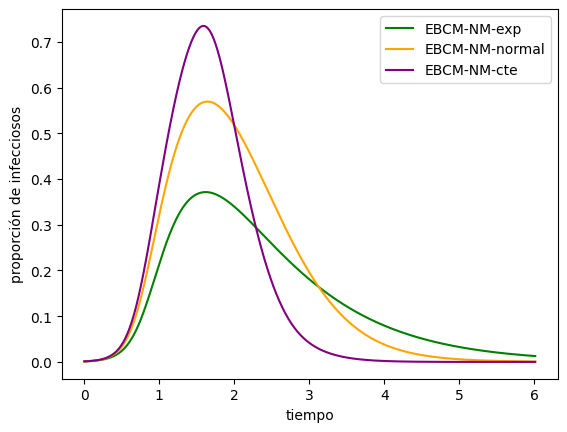

109.66000533103943  segundos en total


In [56]:
import time
start_time_00=time.time()
import scipy.stats
s=0
for k in range(3,61):
    s+=k**(-2.5)
s=s**(-1)
def approx_psi_powerlaw(x):
    u=0
    for k in range(3,61):
        u+=k**(-2.5)*x**k
    return s*u
def approx_prime_psi_powerlaw(x):
    u=0
    for k in range(3,61):
        u+=k**(-1.5)*x**(k-1)
    return s*u
def approx_prime_2_psi_powerlaw(x):
    u=0
    for k in range(3,61):
        u+=(k-1)*k**(-1.5)*x**(k-2)
    return s*u
I_0=0.001
from scipy.optimize import fsolve
def psi_CI_pl(x):
  return approx_psi_powerlaw(x)+I_0-1
theta_0=fsolve(psi_CI_pl,1,)[0]
import matplotlib.pyplot as plt
iniciales=[1-I_0,I_0,0,theta_0]
beta=0.75
gamma=1
fin_T=6
step_len=0.01
def beta_cte(a):
    return beta
def gamma_fun_exp(a):
    return gamma
def gamma_fun_normal(a):
    with np.errstate(divide='raise'):
      try:
        ret=scipy.stats.norm.pdf(a,loc=1,scale=0.75)/(1-scipy.stats.norm.cdf(a,loc=1,scale=0.75))
      except:
        ret=0.01**(-1)
    return ret
def gamma_fun_cte(a):
    if a==1.0:
        return 0.01**(-1)
    else:
        return 0
start_time=time.time()
T,I_exp=EBCM_non_markovian(iniciales=iniciales,riesgo_inf=beta_cte,riesgo_rec=gamma_fun_exp,fgp=approx_psi_powerlaw,
                       fgp_prime_1=approx_prime_psi_powerlaw,fgp_prime_2=approx_prime_2_psi_powerlaw,step_len=step_len,fin=fin_T)
print(time.time()-start_time," segundos para Ley de Potencias")
start_time=time.time()
T,I_normal=EBCM_non_markovian(iniciales=iniciales,riesgo_inf=beta_cte,riesgo_rec=gamma_fun_normal,fgp=approx_psi_powerlaw,
                       fgp_prime_1=approx_prime_psi_powerlaw,fgp_prime_2=approx_prime_2_psi_powerlaw,step_len=step_len,fin=fin_T)
print(time.time()-start_time," segundos para normal")
start_time=time.time()
T,I_cte=EBCM_non_markovian(iniciales=iniciales,riesgo_inf=beta_cte,riesgo_rec=gamma_fun_cte,fgp=approx_psi_powerlaw,
                       fgp_prime_1=approx_prime_psi_powerlaw,fgp_prime_2=approx_prime_2_psi_powerlaw,step_len=step_len,fin=fin_T)
print(time.time()-start_time," segundos para constante")
####
def EBCM_2(y, t, beta, gamma,psi,psi_prime):
    theta, R = y
    dydt = [-beta*theta+beta*(psi_prime(theta)/psi_prime(1))+gamma*(-theta+theta_0), gamma*(1-psi(theta)-R)]
    return dydt
from scipy.integrate import odeint
y0 = [theta_0, 0.0]
t = np.linspace(0, fin_T, 1001)
sol_2 = odeint(EBCM_2, y0, t, args=(beta, gamma,approx_psi_powerlaw,approx_prime_psi_powerlaw))
plt.ylabel('proporción de infecciosos')
plt.xlabel('tiempo')
plt.plot(T,I_exp,'green',label='EBCM-NM-exp')
plt.plot(T,I_normal,'orange',label='EBCM-NM-normal')
plt.plot(T,I_cte,'purple',label='EBCM-NM-cte')
plt.legend()
plt.savefig("EBCN_NM_3.png",dpi=300)
plt.show()
print(time.time()-start_time_00," segundos en total")

## Exploración con las simulaciones exactas.

In [5]:
import networkx as nx
def Monte_Carlo_Step_exp(Lambdas,dict_num_contacts,X_I_indexes):
    Lambda=np.sum(Lambdas)
    tau=np.random.exponential(scale=1/Lambda)
    u_2=np.random.uniform(0,1)
    if(u_2<(Lambda-Lambdas[-1])/Lambda):#Infeccion
        u_3=np.random.uniform(0,1)
        D=0
        k=0
        while(u_3>D):
            D+=Lambdas[k]/(Lambda-Lambdas[-1])
            k+=1
        new_reaction_index=np.random.choice(range(len(dict_num_contacts[str(k-1)])))
        new_reaction=dict_num_contacts[str(k-1)][new_reaction_index]
    else:#Recuperación
        k=0
        new_reaction_index=np.random.choice(range(len(X_I_indexes)))
        new_reaction=X_I_indexes[new_reaction_index]
    return tau,new_reaction,k-1,new_reaction_index
def Gillespie_Direct_Method_Network(beta,gamma,N,X_I_indexes,G_network_initial=nx.Graph(),T=np.inf):
    flag=True
    #Paso 1.
    t=0 #Inicializar $t=0$.
    #Calcular $k_i$ el número de contactos infecciosos del individuo $i$.--------------------
    X_I=len(X_I_indexes)
    X_S=N-X_I
    Historia=[[0,X_S,X_I]]
    dict_num_contacts = {}
    for n in range(X_I+1):
        dict_num_contacts[str(n)]=[]
    num_cont_inf_por_indice=np.zeros(N)
    for i in range(N):
        if(i not in X_I_indexes): #No es infeccioso.
            count_for_i=0
            for j in X_I_indexes:
                if (G_network_initial.has_edge(i,j)):#Es un contacto Susceptible-infeccioso.
                    num_cont_inf_por_indice[i]+=1#Ya que voy a hacer los ciclos, mejor la guardo igual.
                    count_for_i+=1
            dict_num_contacts[str(count_for_i)].append(i)
    #-------------------------------------------
    while(flag):
        #Generar las Lambdas------------------
        Lambda=0
        Lambdas=[]
        for k in range(len(list(dict_num_contacts.keys()))):
            Lambdas.append((beta/N)*len(dict_num_contacts[str(k)])*k)#
            Lambda+=Lambdas[-1]
        Lambdas.append(gamma*X_I)
        Lambda+=Lambdas[-1]
        #-------------------------------------------
        #Paso Monte-Carlo---------------------------
        tau,new_reaction,k_choice,new_reaction_index=Monte_Carlo_Step_exp(Lambdas,dict_num_contacts,X_I_indexes)
        #-------------------------------------------
        #Actualización del sistema.
        if(G_network_initial.nodes[new_reaction]['Estado:']=='Susceptible'):#Se trata de una infección
            num_cont_inf_por_indice[new_reaction]=0
            G_network_initial.nodes[new_reaction]['Estado:']='Infeccioso'#Actualizar su estado
            X_I_indexes.append(new_reaction)
            i=new_reaction
            dict_num_contacts[str(k_choice)].pop(new_reaction_index)#Saca al nuevo infeccioso del conjunto con exactamente k_choice contactos infecciosos.
            #Para cada nodo $j$ conectado a $i$, actualizamos su número de contactos infecciosos como $k_j=k_j+1.$--------------------
            num_max_cont=int(list(dict_num_contacts.keys())[-1])
            for vecino in G_network_initial.neighbors(i):#Para cada vecino del nuevo infectado, le aumentamos el numero de contactos en 1. (lo agregamos a la siguiente categoria y lo sacamos de la anterior)
                if (G_network_initial.nodes[vecino]['Estado:']=='Susceptible'):

                    num_cont_del_vecino=num_cont_inf_por_indice[vecino]
                    if(num_cont_del_vecino+1>num_max_cont):#Si mas de uno crea una categoria, hay error.
                        num_max_cont+=1
                        dict_num_contacts[str(int(num_cont_del_vecino+1))]=[vecino]
                    else:
                        dict_num_contacts[str(int(num_cont_del_vecino+1))].append(vecino)
                    dict_num_contacts[str(int(num_cont_del_vecino))].remove(vecino)
                    num_cont_inf_por_indice[vecino]+=1#Actualizamos ambas fuentes de informacion
            #-------------------------------------------
        else:
            G_network_initial.nodes[new_reaction]['Estado:']='Recuperado'
            num_cont_inf_por_indice[new_reaction]=0#Ya no es relevante
            X_I_indexes.pop(new_reaction_index)
            i=new_reaction
            #Para cada nodo $j$ conectado a $i^* $, actualizamos su número de contactos infecciosos como $k_j=k_j-1.$
            for vecino in G_network_initial.neighbors(i):#Podria ser que ya no tuviera ningun contacto
                num_cont_del_vecino=num_cont_inf_por_indice[vecino]
                if(num_cont_del_vecino!=0):# Es recuperado.
                    dict_num_contacts[str(int(num_cont_del_vecino-1))].append(vecino)
                    dict_num_contacts[str(int(num_cont_del_vecino))].remove(vecino)
                    num_cont_inf_por_indice[vecino]-=1#Actualizamos ambas fuentes de informacion
            #-------------------------------------------
        t+=tau #Actualiza el tiempo $t=t+\tau$.
        X_I=len(X_I_indexes)
        X_S=N-X_I
        Historia.append([t,X_S,X_I])#Focus
        if(X_I==0):
            flag=False
    return pd.DataFrame(Historia,columns=['time','S(t)','I(t)'])

In [31]:
k_dist=np.random.choice(range(3,60),size=N,p=[s*k**(-2.5) for k in range(3,60)],replace=True)
print(np.sum(k_dist))

568


Empieza
Tomó 0.05466580390930176s. para 5 iteraciones con N=10e2
Empieza
Tomó 1.3492555618286133s. para 5 iteraciones con N=10e3
Empieza
Tomó 44.4622540473938s. para 5 iteraciones con N=10e4


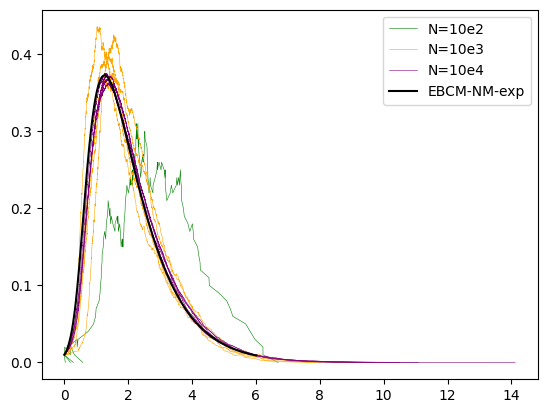

In [47]:
#Ejemplo
import time
import pandas as pd
colores=['green','orange','purple']
for pot in [2,3,4]:
    iter_time = time.time()
    N=10**pot
    beta=0.75*N
    gamma=1
    n=int(N*0.1)
    ksum=1
    k_dist=1
    while(np.sum(k_dist)%2==1):
      k_dist=np.random.choice(range(3,60),size=N,p=[s*k**(-2.5) for k in range(3,60)],replace=True)
    G=nx.configuration_model(k_dist)
    G = nx.Graph(G)#Remover multi-aristas
    G.remove_edges_from(nx.selfloop_edges(G))#Remover bucles
    #pos=nx.spring_layout(G,seed=2,k=3)
    np.random.seed(0)
    X_I_indexes=np.random.choice(N,size=int(N*0.01),replace=False).tolist()
    for k in range(N):
        if k in X_I_indexes:
            G.nodes[k]['Estado:']='Infeccioso'
        else:
            G.nodes[k]['Estado:']='Susceptible'
    print("Empieza")
    #------------------------------------ Markoviano
    for iter in range(5):
        G_copy=G.copy()
        X_I_indexes_copy=X_I_indexes.copy()
        H=Gillespie_Direct_Method_Network(beta,gamma,N,X_I_indexes=X_I_indexes_copy,G_network_initial=G_copy,T=np.inf)
        if(iter==0):
            plt.plot(H['time'],H['I(t)']/N, colores[pot-2],linewidth=0.4,label='N=10e'+str(pot))
        else:
            plt.plot(H['time'],H['I(t)']/N, colores[pot-2],linewidth=0.4)
        #------------------------------------
    print("Tomó "+str(time.time()-iter_time)+'s. para 5 iteraciones con N=10e'+str(pot))
INPUT = (0.99*N, 0.01*N, 0.0)
t_start = 0.0; t_end = 10; t_inc = .01
t_range = np.arange(t_start, t_end+t_inc, t_inc)
#plt.plot(t_range,g(t_range,INPUT,[beta*0.1,gamma,N])/N, 'k',label='Campo Medio')
plt.plot(T,I_exp,'k',label='EBCM-NM-exp')
plt.legend()
plt.show()